In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Analyse en Composante Principale

- 1 Standardisation de nos données

- 2 Determiner la matrice de corrélation

- 3 Trouver les valeurs propres et les vecteurs propres de la matrice symétrique ( corrélation )

- 4 Conserver les k premiers vecteurs selon l'inertie souhaitée

- 5 Projection des nos données par la matrice de passage 

### Exercice 1 :  Voitures

In [2]:
voitures={"Alfasud" : [1350 ,79 ,393, 161, 870 ,165],
"Audi" : [1588, 85, 468, 177, 1110 ,160 ],
"Simca"  : [1294 ,68, 424, 168, 1050 ,152 ],
"Citroen"  : [1222, 59, 412, 161, 930 ,151 ],
"Fiat" : [1585, 98, 439, 164,1105 ,165 ],
"Lancia"  :[1297 ,82 ,429, 169, 1080 ,160 ],
"Peugeot" :[ 1796, 79, 449 ,169, 1160 ,154 ],
"Renault16" : [1565,55, 424, 163, 1010 ,140], 
"Renault30": [2664, 128, 452, 173, 1320,180], 
"Toyota" : [1166, 55 ,399, 157, 815, 140], 
"Alfetta" :[ 1570, 109, 428, 162, 1060, 175], 
"Princess" : [1798 ,82, 445, 172, 1160 ,158 ],
"Datsun" :[1998 ,115, 469, 169, 1370 ,160 ],
"Taunus" : [1993, 98 ,438 ,170, 1080 ,167 ],
"Rancho" :[1442 ,80 ,431, 166, 1129, 144 ],
"Mazda" :[1769 ,83,440,165 ,1095, 165 ],
"Opel": [1979, 100 ,459 ,173, 1120 ,173], 
"Lada" : [1294, 68, 404 ,161, 955, 140] }

In [3]:
# Définir sous forme d'un dictionnaire, les 6 variables (cylindrée, puissance, longueur, largeur, poids, vitesse max)
X= np.array([value for value in voitures.values()])
print(X)

[[1350   79  393  161  870  165]
 [1588   85  468  177 1110  160]
 [1294   68  424  168 1050  152]
 [1222   59  412  161  930  151]
 [1585   98  439  164 1105  165]
 [1297   82  429  169 1080  160]
 [1796   79  449  169 1160  154]
 [1565   55  424  163 1010  140]
 [2664  128  452  173 1320  180]
 [1166   55  399  157  815  140]
 [1570  109  428  162 1060  175]
 [1798   82  445  172 1160  158]
 [1998  115  469  169 1370  160]
 [1993   98  438  170 1080  167]
 [1442   80  431  166 1129  144]
 [1769   83  440  165 1095  165]
 [1979  100  459  173 1120  173]
 [1294   68  404  161  955  140]]


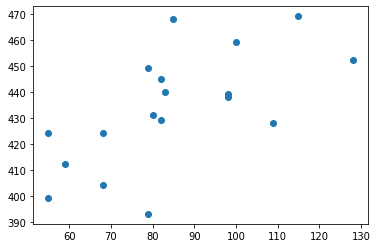

In [4]:
#Représenter quelques corrélations entre couples de variables
plt.scatter(X[:,1],X[:,2])

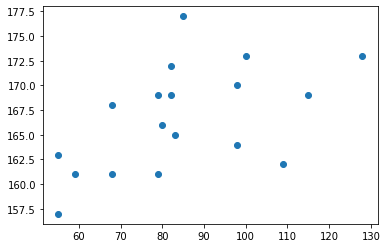

In [5]:
#Représenter quelques corrélations entre couples de variables
plt.scatter(X[:,1],X[:,3])

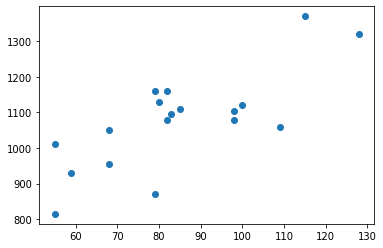

In [6]:
#Représenter quelques corrélations entre couples de variables
plt.scatter(X[:,1],X[:,4])

## 1 . Standardiser X

In [7]:
print("Moyenne avant :")
print(np.mean(X,axis=0))
print("Variance avant :")
print(np.std(X,axis=0))

n_X=(X-np.mean(X,axis=0))/np.std(X,axis=0) # les variables sont en colonne
n1_X=X-np.mean(X,axis=0)//np.std(X,axis=0)
print("Moyenne après :")
print(np.mean(n_X,axis=0))
print("Variance après :")
print(np.std(n_X,axis=0))


Moyenne avant :
[1631.66666667   84.61111111  433.5         166.66666667 1078.83333333
  158.27777778]
Variance avant :
[363.39449027  19.80218531  21.48449053   5.16397779 133.09906503
  11.79833112]
Moyenne après :
[-2.15876699e-16 -1.60365548e-16  1.23358114e-17  1.83803590e-15
  5.85951041e-16  5.42775701e-16]
Variance après :
[1. 1. 1. 1. 1. 1.]


## 2. Calculer la matrice de corrélation 

True
[[1.         0.79662771 0.70146192 0.62975716 0.78895203 0.66493402]
 [0.79662771 1.         0.64136235 0.52083197 0.765293   0.84437948]
 [0.70146192 0.64136235 1.         0.84926635 0.86809028 0.47592847]
 [0.62975716 0.52083197 0.84926635 1.         0.71687392 0.47294527]
 [0.78895203 0.765293   0.86809028 0.71687392 1.         0.4775956 ]
 [0.66493402 0.84437948 0.47592847 0.47294527 0.4775956  1.        ]]


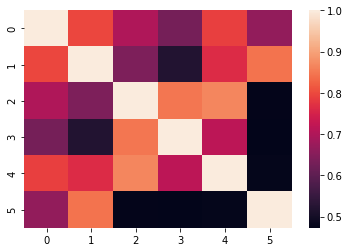

In [8]:
Cor=np.round(np.corrcoef(n_X.T),10)   #pour être sur que la matrice soit symétrique
#Verifions si la matrice est symétrique
print(np.array_equal(Cor,Cor.T))
print(Cor)
sns.heatmap(Cor)


## 3. Calculer les valeurs propres et les vecteurs propres

In [9]:
eigen_values,eigen_matrix= np.linalg.eig(Cor)
print(eigen_values.shape,eigen_matrix.shape)
print(eigen_values)
print("P=")
print(eigen_matrix)

(6,) (6, 6)
[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]
P=
[[ 0.42493602  0.12419108  0.35361252  0.80778648  0.15158003 -0.05889517]
 [ 0.42179441  0.41577389  0.18492049 -0.35779199 -0.29373465 -0.63303302]
 [ 0.42145993 -0.41181773 -0.06763394 -0.27975231  0.73056903 -0.19029153]
 [ 0.38692224 -0.446087   -0.60486812  0.21156941 -0.47819008 -0.10956624]
 [ 0.43051198 -0.24267581  0.48439601 -0.30171136 -0.30455842  0.5808122 ]
 [ 0.35894427  0.6198626  -0.48547226 -0.0735743   0.18865511  0.45852167]]


In [26]:
def inertie(k,eigen_values):
    return sum([eigen_values[i] for i in range(k)])/np.sum(eigen_values)
print(inertie(1,eigen_values))
print(inertie(2,eigen_values))

0.7368096766107112
0.8794867248151252


Text(0.5, 1.0, 'Ebouli des valeurs propres')

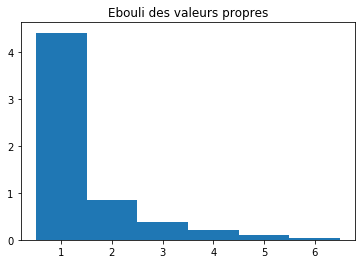

In [27]:
#Représenter l'ébouli des valeurs propres
plt.bar(list(range(1,X.shape[1]+1)), eigen_values,1  )
plt.title("Ebouli des valeurs propres")

## 4- Conserver les k premiers vecteurs selon l'inertie

In [28]:
k=2
P=eigen_matrix[:,:k].T
print(P)
print(P.shape)

[[ 0.42493602  0.42179441  0.42145993  0.38692224  0.43051198  0.35894427]
 [ 0.12419108  0.41577389 -0.41181773 -0.446087   -0.24267581  0.6198626 ]]
(2, 6)


## 5- Projection de nos données

In [29]:
new_X=np.dot(P,n_X.T)
print(new_X)
print(new_X.shape)

[[-2.13892361  1.56145859 -1.11938528 -2.5737417   0.4278552  -0.30423764
   0.6839285  -1.94849257  4.40973457 -3.98578242  0.43765819  1.01817538
   2.94108031  1.31488038 -0.69111137  0.38570887  2.28976824 -2.70857363]
 [ 1.78568102 -1.52704027 -0.67450517  0.11288416  0.69556731 -0.19614878
  -0.93305677 -0.98044805  1.06363317  0.23624042  1.91244816 -0.8417121
  -0.55917459  0.48652246 -0.89772139  0.35618457  0.10434464 -0.1436988 ]]
(2, 18)


# Tracé les différents véhicules suivant les deux composantes principales
plt.figure()
plt.scatter(new_X[0,:],new_X[1,:],marker='o')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title("Tracé suivant les composantes principales")

# Implémentation de l'APC

In [30]:
def reductionAPC(X,i=0.8):
    #1.stadartisation
    n_X=(X-np.mean(X,axis=0))/np.std(X,axis=0) # les variables sont en colonne
    #2.matrice corrélation
    Cor=np.round(np.corrcoef(n_X.T),8)   
    assert np.array_equal(Cor,Cor.T)#pour être sur que la matrice soit symétrique
    #3.vecteur propres, valeur propres
    eigen_values,eigen_matrix= np.linalg.eig(Cor)
    #4.choix selon inertie
    k=1
    while inertie(k,eigen_values)<i:
        k+=1
    P=eigen_matrix[:,:k].T
    #Projection
    return np.dot(P,n_X.T)   
new_X=reductionAPC(X,i=0.8)
print(new_X)


[[-2.13892361  1.56145859 -1.11938528 -2.5737417   0.4278552  -0.30423764
   0.6839285  -1.94849257  4.40973457 -3.98578242  0.43765818  1.01817538
   2.94108031  1.31488038 -0.69111137  0.38570887  2.28976824 -2.70857363]
 [ 1.78568102 -1.52704027 -0.67450517  0.11288416  0.69556731 -0.19614878
  -0.93305677 -0.98044805  1.06363317  0.23624042  1.91244816 -0.8417121
  -0.55917459  0.48652246 -0.89772139  0.35618457  0.10434464 -0.1436988 ]]


# Comparons avec l'implémentation du APC de sklearn

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

n1_X=StandardScaler().fit_transform(X)
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(n1_X)
print(principalComponents.T)

[[-2.13892361  1.56145859 -1.11938528 -2.5737417   0.4278552  -0.30423764
   0.6839285  -1.94849257  4.40973457 -3.98578242  0.43765819  1.01817538
   2.94108031  1.31488038 -0.69111137  0.38570887  2.28976824 -2.70857363]
 [ 1.78568102 -1.52704027 -0.67450517  0.11288416  0.69556731 -0.19614878
  -0.93305677 -0.98044805  1.06363317  0.23624042  1.91244816 -0.8417121
  -0.55917459  0.48652246 -0.89772139  0.35618457  0.10434464 -0.1436988 ]]


In [32]:
print(new_X-principalComponents.T)

[[-9.94693217e-11 -1.94885663e-10  4.13566958e-10  3.45794504e-11
  -5.86320159e-10  1.03879738e-10  3.02007419e-10  4.61858773e-10
   4.54892124e-10 -2.81834556e-10 -8.66658134e-10  5.25825383e-10
  -2.48259635e-10  1.44664281e-11  1.51770263e-10 -4.12341827e-11
  -2.45014231e-10  1.00850439e-10]
 [-1.88261629e-10 -1.73357328e-09 -2.10097162e-10 -6.70197134e-10
  -1.15646948e-09 -9.00186203e-10  6.25419827e-10  1.01709841e-09
   3.32988970e-09 -7.15273146e-10 -1.48111789e-09  9.24574972e-10
   2.59079536e-10  8.23909940e-10  1.31508471e-10  4.93007302e-11
  -4.08006615e-10  3.02385533e-10]]


<div class="alert alert-block alert-info">
La différence est acceptable.</div>